# <center><b>Escalado de Datos</b></center>

## Librerías

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import rankdata
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from scipy.special import softmax
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Funciones

In [19]:
def plot_density(x,y = ''):
    plt.figure(figsize = (6,4))
    sns.kdeplot(x, fill=True, color='skyblue')
    plt.title(f"Densidad de la Variable {y}")
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.show()

## Datos

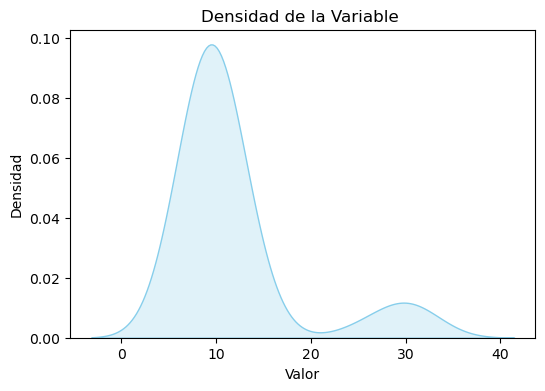

In [20]:
np.random.seed(42)
normal_values = np.random.normal(loc=10, scale=2, size=40)
outliers = np.random.normal(loc=30, scale=3, size=5)
data = np.concatenate([normal_values, outliers])
df = pd.DataFrame(data, columns=["Variable"])

plot_density(df['Variable'])

## Métodos de Escalados

### Z-score

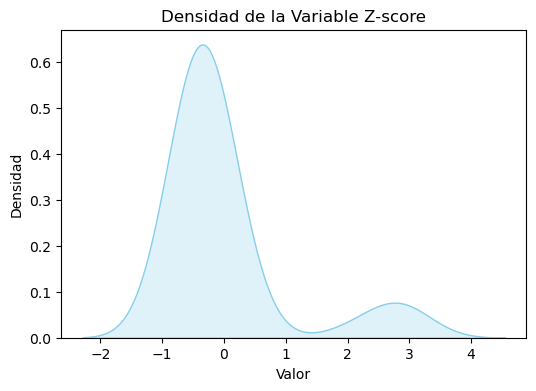

In [22]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'Z-score')

### Min-Max

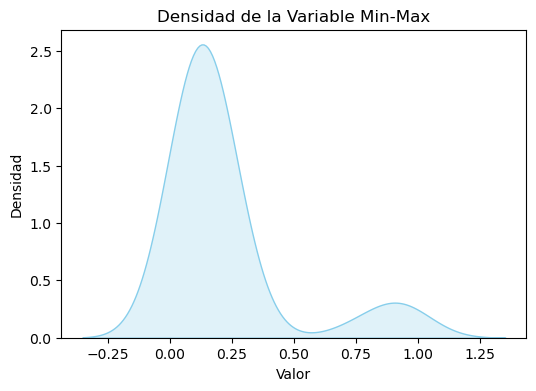

In [24]:
scaler = MinMaxScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'Min-Max')

### Desviación Absoluta Mediana (MAD)

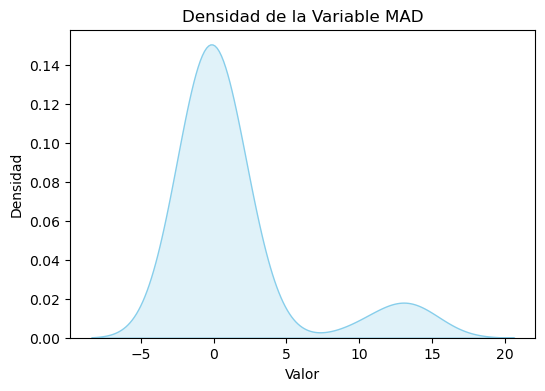

In [26]:
median_values = df.median()
mad_values = df.apply(lambda x: np.median(np.abs(x - np.median(x))), axis=0)
df_scaler = (df - median_values) / mad_values
plot_density(df_scaler['Variable'],'MAD')

### Logarítmico

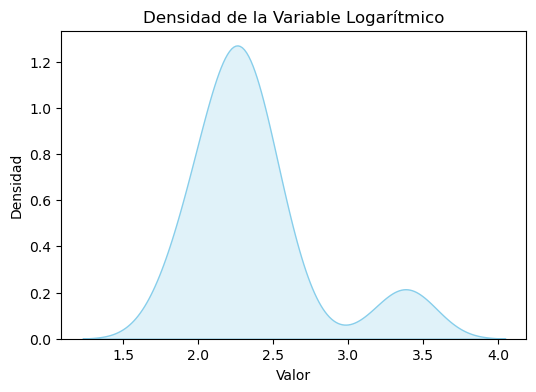

In [27]:
# np.log10()
df_scaler = np.log(df)
plot_density(df_scaler['Variable'],'Logarítmico')

### Robusta con Mediana y Desviación Estándar

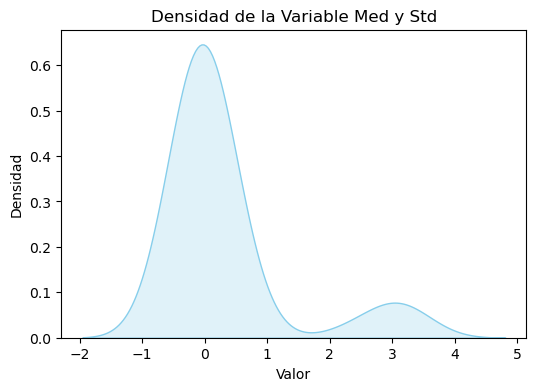

In [28]:
median = df.median()
std = df.std()
df_scaler = (df - median) / std
plot_density(df_scaler['Variable'],'Med y Std')

### Percentiles (Rango Interpercentílico)

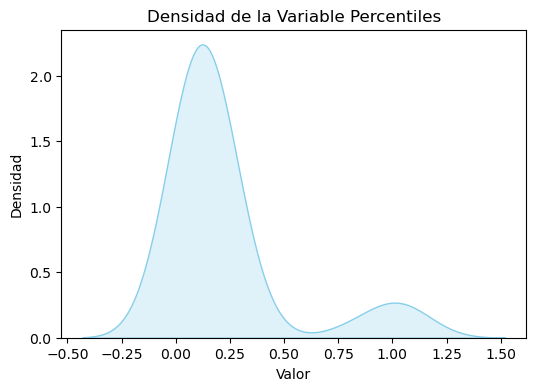

In [29]:
percentile_min = df.quantile(0.05)
percentile_max = df.quantile(0.95)
df_scaler = (df - percentile_min) / (percentile_max - percentile_min)
plot_density(df_scaler['Variable'],'Percentiles')

### Robusto por Rangos

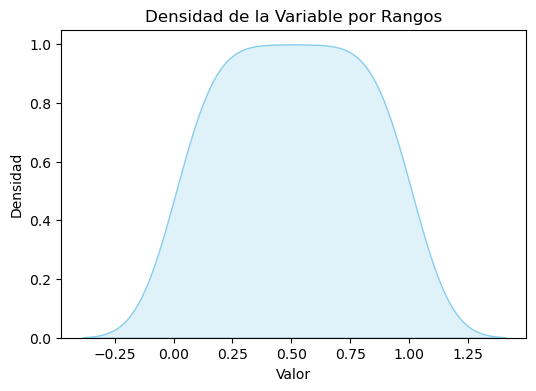

In [31]:
df_scaler = df.apply(rankdata) / len(df)
plot_density(df_scaler['Variable'],'por Rangos')

### Rango Intercuartílico

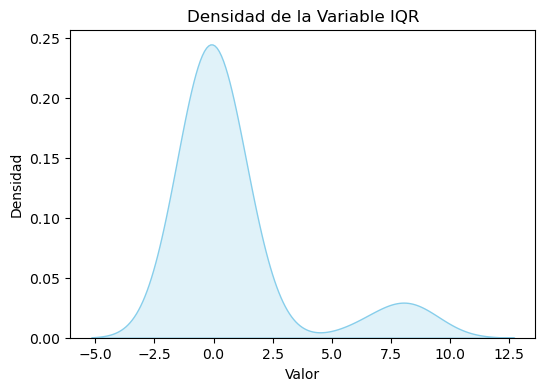

In [42]:
scaler = RobustScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'IQR')

### Basado en Información Teórica

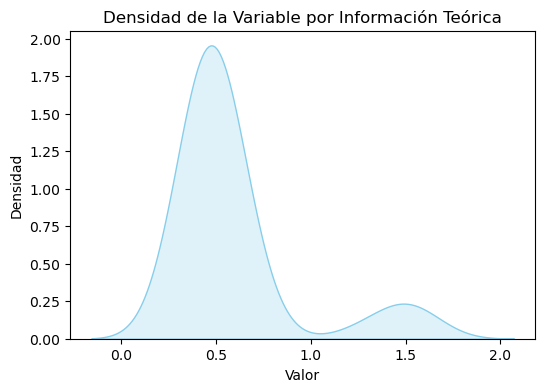

In [45]:
LI = pd.Series([0],index=df.columns)
LS = pd.Series([20],index=df.columns)
df_scaler = (df - LI) / (LS - LI)
plot_density(df_scaler['Variable'],'por Información Teórica')

### Basada en Función de Densidad

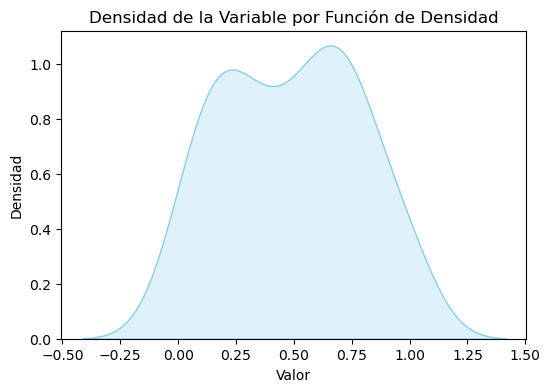

In [46]:
percentiles = np.percentile(df, [0, 25, 50, 75, 100])
df_scaler = pd.DataFrame(np.interp(df, percentiles, [0, 0.25, 0.5, 0.75, 1]), columns = df.columns)
plot_density(df_scaler['Variable'],'por Función de Densidad')

### Diferencia de medias

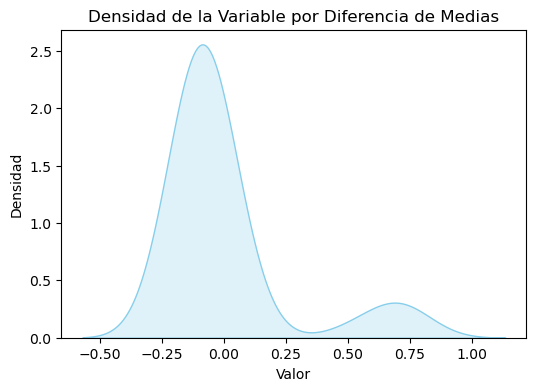

In [47]:
mean = np.mean(df)
diff_max_min = np.max(df) - np.min(df)
df_scaler = (df - mean) / diff_max_min
plot_density(df_scaler['Variable'],'por Diferencia de Medias')

### Decimal Scaling

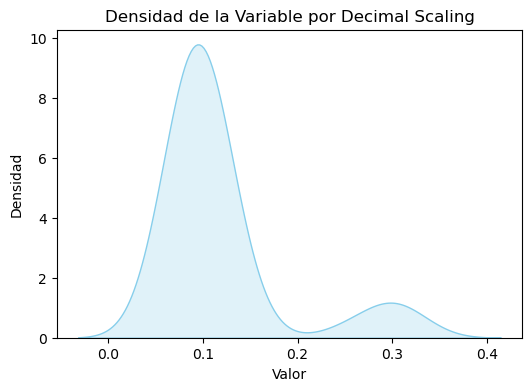

In [48]:
max_abs = np.max(np.abs(df))
df_scaler = df / (10 ** np.ceil(np.log10(max_abs)))
plot_density(df_scaler['Variable'],'por Decimal Scaling')

### Box-Cox

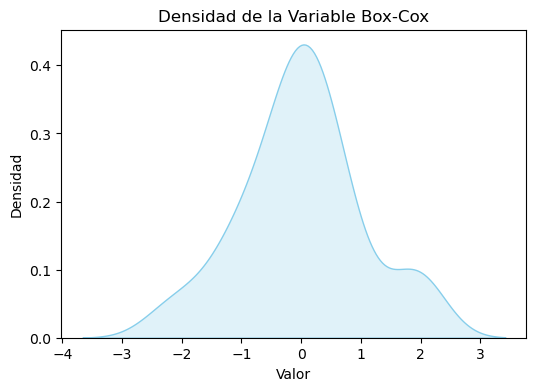

In [51]:
scaler = PowerTransformer(method='box-cox')
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'Box-Cox')

### Yeo-Johnson

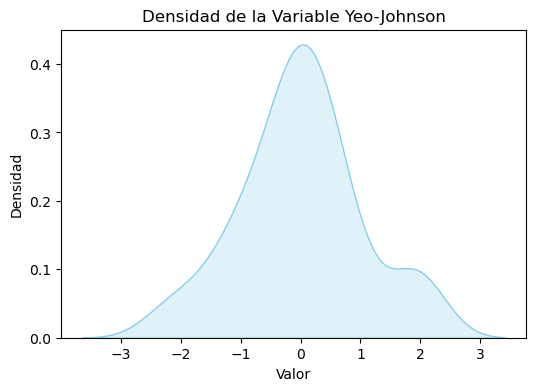

In [55]:
scaler = PowerTransformer(method='yeo-johnson')
df_scaler = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'Yeo-Johnson')

### Softmax

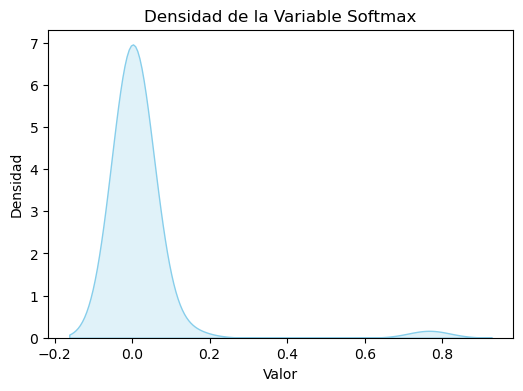

In [56]:
df_scaler = df.apply(softmax, axis=0)
plot_density(df_scaler['Variable'],'Softmax')

### Escalas Logarítmicas

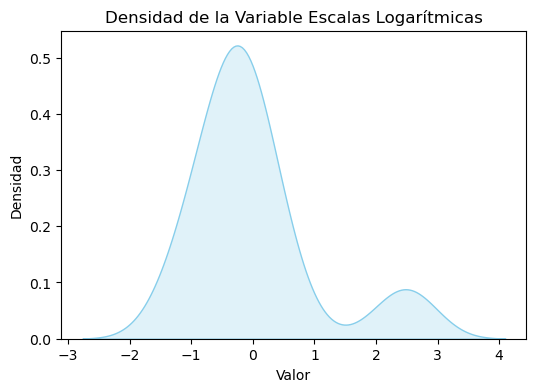

In [57]:
df_log = np.log(df)
mean = df_log.mean()
std = df_log.std()
df_scaler = (df_log - mean) / std
plot_density(df_scaler['Variable'],'Escalas Logarítmicas')

### QuantileTransformer (RankGauss)

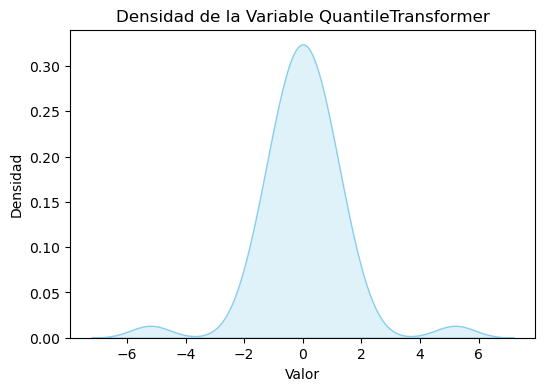

In [59]:
qt_normal = QuantileTransformer(output_distribution='normal', random_state=0, n_quantiles=df.shape[0])
df_scaler = pd.DataFrame(qt_normal.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'QuantileTransformer')

### L1 Normalization (Norma Manhattan)

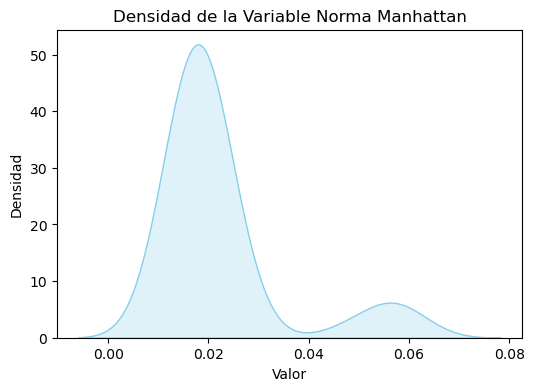

In [65]:
normalizer_l1 = Normalizer(norm='l1')
df_scaler = pd.DataFrame(normalizer_l1.fit_transform(df.T).T, columns=df.columns)
plot_density(df_scaler['Variable'],'Norma Manhattan')

### L2 Normalization (Norma Euclidiana)

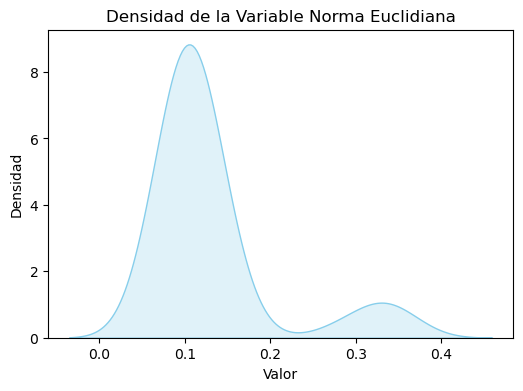

In [71]:
normalizer_l2 = Normalizer(norm='l2')
df_scaler = pd.DataFrame(normalizer_l2.fit_transform(df.T).T, columns=df.columns)
plot_density(df_scaler['Variable'],'Norma Euclidiana')

### MaxAbsScaler

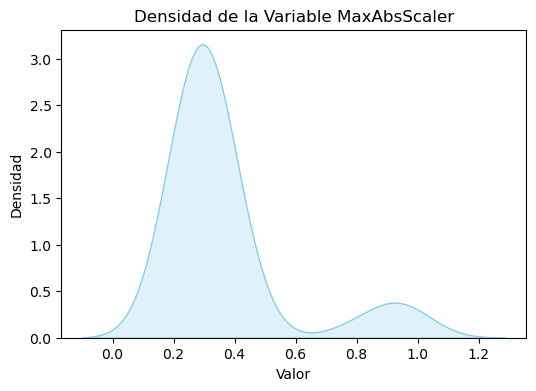

In [70]:
scaler_maxabs = MaxAbsScaler()
df_scaler = pd.DataFrame(scaler_maxabs.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'MaxAbsScaler')

### Sigmoid Scaling

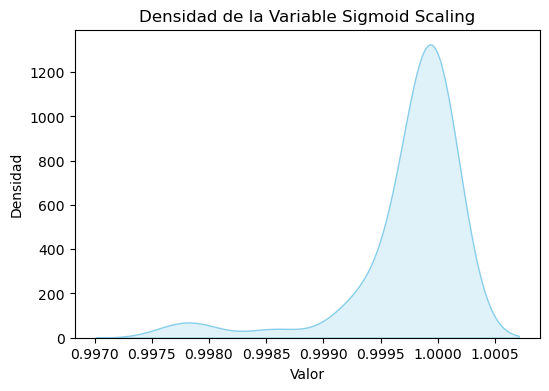

In [73]:
df_scaler = 1 / (1 + np.exp(-df))
plot_density(df_scaler['Variable'],'Sigmoid Scaling')

### RankUniforn

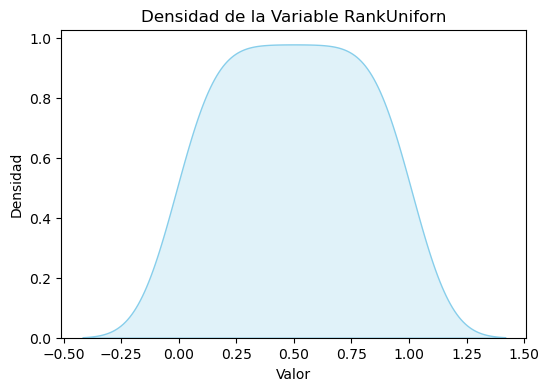

In [74]:
scaler_rankgauss = QuantileTransformer(output_distribution='uniform', random_state=42, n_quantiles = df.shape[0])
df_scaler = pd.DataFrame(scaler_rankgauss.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'RankUniforn')

### KBinsDiscretizer

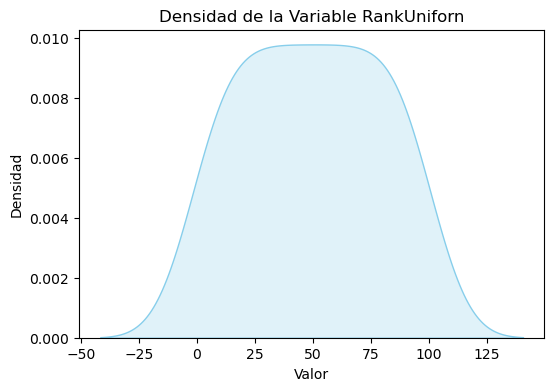

In [79]:
discretizer = KBinsDiscretizer(n_bins=100, encode='ordinal', strategy='quantile')
df_scaler = pd.DataFrame(discretizer.fit_transform(df), columns=df.columns)
plot_density(df_scaler['Variable'],'RankUniforn')

### Logit Scaling

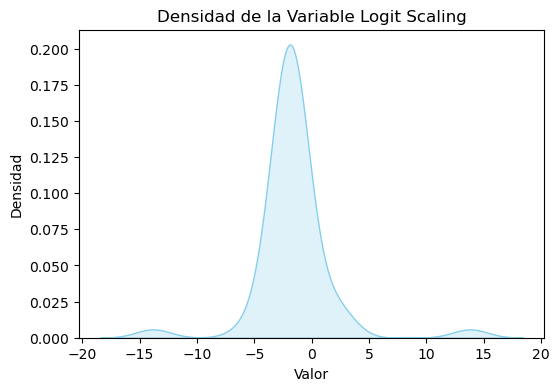

In [107]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
epsilon = 1e-6
df_norm = df_norm.clip(epsilon, 1 - epsilon)
df_scaler = np.log(df_norm / (1 - df_norm))
plot_density(df_scaler['Variable'],'Logit Scaling')

### Winsorization 

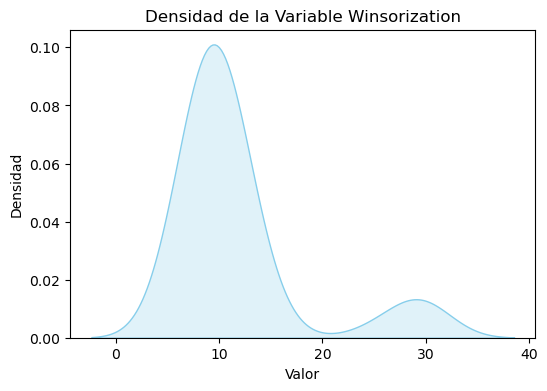

In [102]:
df_scaler = df.apply(lambda x: winsorize(x, limits=[0.05, 0.05]))
plot_density(df_scaler['Variable'],'Winsorization')

### VIF-based scaling

### WOE (Weight of Evidence) Transformation